In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [3]:
df = pd.read_csv("Desktop/data_stocks.csv")
df.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [4]:
df.shape

(41266, 502)

In [5]:
pca = PCA()
new_df = pca.fit_transform(df)

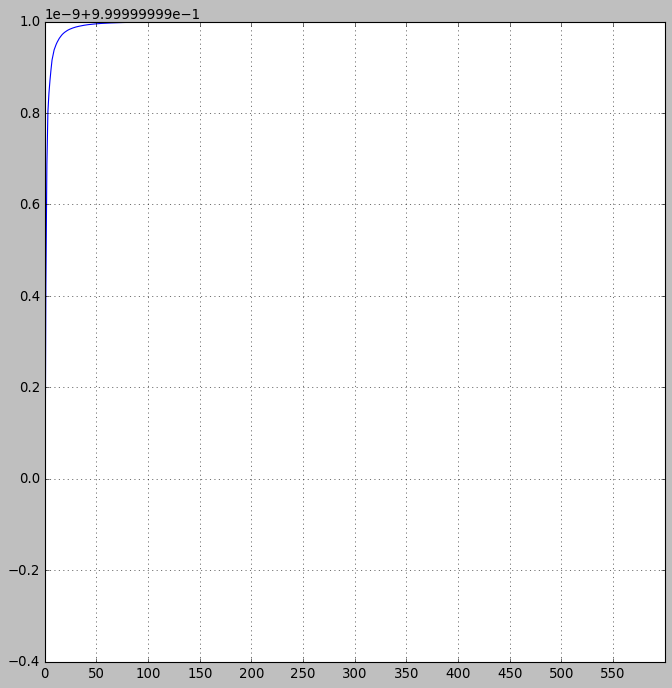

In [9]:
plt.figure(figsize=(10,10))
plt.style.use("classic")
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xticks(range(0,600,50))
plt.grid(True)

In [10]:
pca = PCA(n_components=50)
new_df = pca.fit_transform(df)

In [11]:
pca_vis = PCA(n_components=2)
vis_df = pca_vis.fit_transform(df)

In [13]:
pd.DataFrame(new_df)

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,6.522482e+06,111.716697,72.235811,33.261031,-13.463842,-17.534290,30.608603,-5.886468,-6.534767,-22.462332,...,2.319635,-0.476962,4.942342,-2.436926,0.633674,-0.592401,-0.626513,-3.054759,-0.797317,1.278534
1,6.522422e+06,106.254065,72.560771,32.707286,-13.649149,-15.787464,31.370268,-5.331450,-6.722320,-24.718157,...,2.348777,-1.041530,4.999579,-2.778041,0.676305,-0.748165,-0.439100,-2.503721,-1.081998,1.247567
2,6.522362e+06,104.834983,70.153514,35.137276,-14.792512,-13.666910,30.087312,-3.332639,-7.679284,-25.518031,...,2.287305,-0.812381,4.985354,-2.873311,0.048555,0.094246,-0.072065,-2.429014,-0.591469,1.328049
3,6.522302e+06,107.207490,70.845934,37.194451,-16.018351,-12.987471,29.721569,-3.148561,-7.595598,-26.058380,...,2.274986,-0.726797,4.480033,-2.812911,-0.135618,-1.205662,-0.573208,-2.539823,-0.203638,2.018789
4,6.522242e+06,106.149067,69.344458,40.307334,-17.377282,-11.525847,29.076211,-0.788834,-9.973308,-27.473440,...,1.803240,-1.374063,4.243567,-2.874335,-1.105266,-1.626088,-1.121528,-1.920175,-0.621273,2.261687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41261,-6.460678e+06,113.611731,-45.231709,-36.335193,4.663972,4.430224,37.202213,16.740846,6.756244,12.821373,...,-1.393904,-2.443556,-1.206950,-0.410815,2.281766,-1.067359,1.701099,2.714683,3.839197,2.050913
41262,-6.460738e+06,112.968970,-44.509268,-36.578308,4.790031,4.401011,37.070445,16.834712,7.247470,12.928979,...,-1.274654,-2.383983,-1.128409,-0.355245,2.358389,-0.959433,1.740205,2.614330,3.825452,2.098950
41263,-6.460798e+06,113.712989,-44.172905,-36.315120,4.982276,4.930057,36.667253,15.944370,7.881820,12.879625,...,-1.432033,-2.245567,-0.948167,-0.406616,2.319915,-0.663395,1.853869,2.563958,3.727022,1.992889
41264,-6.460858e+06,114.430644,-43.727336,-36.304340,4.803207,5.036362,36.537731,15.424381,7.677676,12.794719,...,-1.358391,-2.335068,-1.206296,-0.395449,2.351734,-1.065910,1.552415,2.450637,3.933954,2.252081


In [14]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(new_df)
kmeans.predict(new_df)

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [20]:
cluster = []
inertia = []
for i in range(3,20 ,3):
    kmean = KMeans(n_clusters=i)
    kmean.fit(new_df)
    cluster.append(i)
    inertia.append(kmean.inertia_)

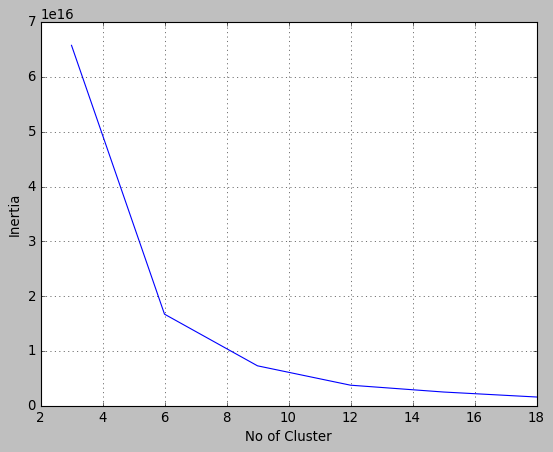

In [22]:
plt.plot(cluster , inertia)
plt.xlabel("No of Cluster")
plt.ylabel("Inertia")
plt.grid(True)

In [24]:
kmean = KMeans(n_clusters=12)
kmean.fit(new_df)

KMeans(n_clusters=12)

In [27]:
vis_df = pd.DataFrame(vis_df)
vis_df

,0,1
0,6.522482e+06,111.716697
1,6.522422e+06,106.254065
2,6.522362e+06,104.834983
3,6.522302e+06,107.207490
4,6.522242e+06,106.149067
...,...,...
41261,-6.460678e+06,113.611731
41262,-6.460738e+06,112.968970
41263,-6.460798e+06,113.712989
41264,-6.460858e+06,114.430644


In [28]:
vis_df["Prediction"] = kmean.predict(new_df)

In [31]:
vis_df.head()

,0,1,Prediction
0,6.522482e+06,111.716697,8
1,6.522422e+06,106.254065,8
2,6.522362e+06,104.834983,8
3,6.522302e+06,107.207490,8
4,6.522242e+06,106.149067,8


In [34]:
vis_df[vis_df["Prediction"] == 0].iloc[:,0]

37747   -5.573518e+06
37748   -5.573578e+06
37749   -5.573638e+06
37750   -5.573698e+06
37751   -5.573758e+06
             ...     
41261   -6.460678e+06
41262   -6.460738e+06
41263   -6.460798e+06
41264   -6.460858e+06
41265   -6.460918e+06
Name: 0, Length: 3519, dtype: float64

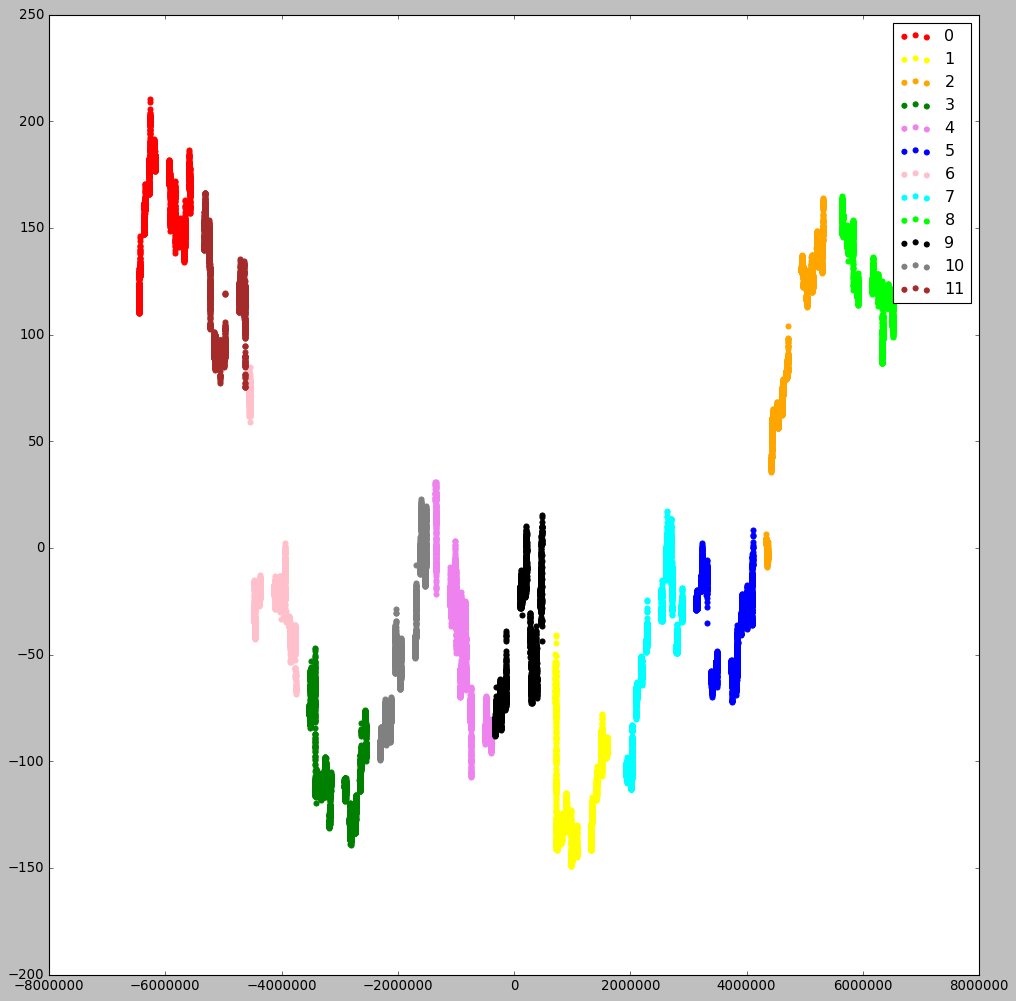

In [43]:
plt.figure(figsize=(15,15))
plt.scatter(vis_df[vis_df["Prediction"] == 0].iloc[:,0] , vis_df[vis_df["Prediction"] == 0].iloc[:,1] , color = "red" , label = 0)
plt.scatter(vis_df[vis_df["Prediction"] == 1].iloc[:,0] , vis_df[vis_df["Prediction"] == 1].iloc[:,1] , color = "yellow", label = 1)
plt.scatter(vis_df[vis_df["Prediction"] == 2].iloc[:,0] , vis_df[vis_df["Prediction"] == 2].iloc[:,1] , color = "orange", label = 2)
plt.scatter(vis_df[vis_df["Prediction"] == 3].iloc[:,0] , vis_df[vis_df["Prediction"] == 3].iloc[:,1] , color = "green", label = 3)
plt.scatter(vis_df[vis_df["Prediction"] == 4].iloc[:,0] , vis_df[vis_df["Prediction"] == 4].iloc[:,1] , color = "violet", label = 4)
plt.scatter(vis_df[vis_df["Prediction"] == 5].iloc[:,0] , vis_df[vis_df["Prediction"] == 5].iloc[:,1] , color = "blue", label = 5)
plt.scatter(vis_df[vis_df["Prediction"] == 6].iloc[:,0] , vis_df[vis_df["Prediction"] == 6].iloc[:,1] , color = "pink", label = 6)
plt.scatter(vis_df[vis_df["Prediction"] == 7].iloc[:,0] , vis_df[vis_df["Prediction"] == 7].iloc[:,1] , color = "cyan", label = 7)
plt.scatter(vis_df[vis_df["Prediction"] == 8].iloc[:,0] , vis_df[vis_df["Prediction"] == 8].iloc[:,1] , color = "lime", label = 8)
plt.scatter(vis_df[vis_df["Prediction"] == 9].iloc[:,0] , vis_df[vis_df["Prediction"] == 9].iloc[:,1] , color = "black", label = 9)
plt.scatter(vis_df[vis_df["Prediction"] == 10].iloc[:,0] , vis_df[vis_df["Prediction"] == 10].iloc[:,1] , color = "grey", label = 10)
plt.scatter(vis_df[vis_df["Prediction"] == 11].iloc[:,0] , vis_df[vis_df["Prediction"] == 11].iloc[:,1] , color = "brown", label = 11)
plt.legend()

In [46]:
for i in df.columns:
    print(i)

DATE
SP500
NASDAQ.AAL
NASDAQ.AAPL
NASDAQ.ADBE
NASDAQ.ADI
NASDAQ.ADP
NASDAQ.ADSK
NASDAQ.AKAM
NASDAQ.ALXN
NASDAQ.AMAT
NASDAQ.AMD
NASDAQ.AMGN
NASDAQ.AMZN
NASDAQ.ATVI
NASDAQ.AVGO
NASDAQ.BBBY
NASDAQ.BIIB
NASDAQ.CA
NASDAQ.CBOE
NASDAQ.CELG
NASDAQ.CERN
NASDAQ.CHRW
NASDAQ.CHTR
NASDAQ.CINF
NASDAQ.CMCSA
NASDAQ.CME
NASDAQ.COST
NASDAQ.CSCO
NASDAQ.CSX
NASDAQ.CTAS
NASDAQ.CTSH
NASDAQ.CTXS
NASDAQ.DISCA
NASDAQ.DISCK
NASDAQ.DISH
NASDAQ.DLTR
NASDAQ.EA
NASDAQ.EBAY
NASDAQ.EQIX
NASDAQ.ESRX
NASDAQ.ETFC
NASDAQ.EXPD
NASDAQ.EXPE
NASDAQ.FAST
NASDAQ.FB
NASDAQ.FFIV
NASDAQ.FISV
NASDAQ.FITB
NASDAQ.FLIR
NASDAQ.FOX
NASDAQ.FOXA
NASDAQ.GILD
NASDAQ.GOOG
NASDAQ.GOOGL
NASDAQ.GRMN
NASDAQ.GT
NASDAQ.HAS
NASDAQ.HBAN
NASDAQ.HOLX
NASDAQ.HSIC
NASDAQ.IDXX
NASDAQ.ILMN
NASDAQ.INCY
NASDAQ.INFO
NASDAQ.INTC
NASDAQ.INTU
NASDAQ.ISRG
NASDAQ.JBHT
NASDAQ.KHC
NASDAQ.KLAC
NASDAQ.LKQ
NASDAQ.LRCX
NASDAQ.MAR
NASDAQ.MAT
NASDAQ.MCHP
NASDAQ.MDLZ
NASDAQ.MNST
NASDAQ.MSFT
NASDAQ.MU
NASDAQ.MYL
NASDAQ.NAVI
NASDAQ.NDAQ
NASDAQ.NFLX
NASDAQ.NTAP
NASDAQ.NTRS


In [47]:
df[""]

KeyError: 'historic_stock'